# 01) Data exploration

## Read-in headlines

In [1]:
import pandas as pd
import numpy as np

# read-in data and print total headline count
df = pd.read_csv('../Data/original_headlines.csv', encoding='utf-8')
print(str(round(len(df)/1000, 1)) + 'k headlines')

77.0k headlines


## Risk vs non-risk

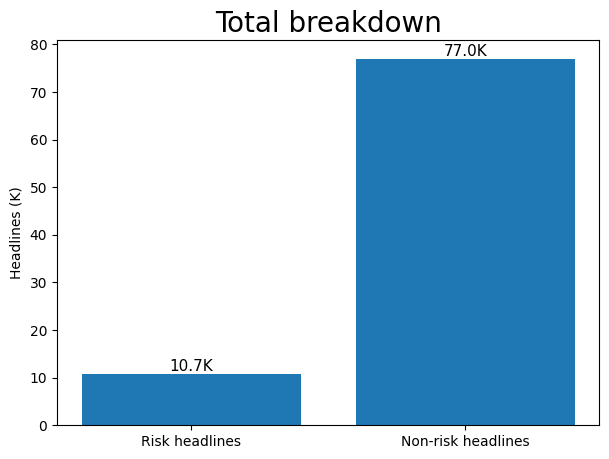

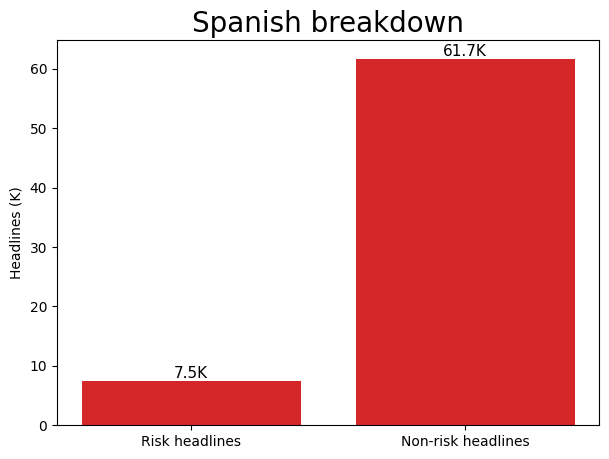

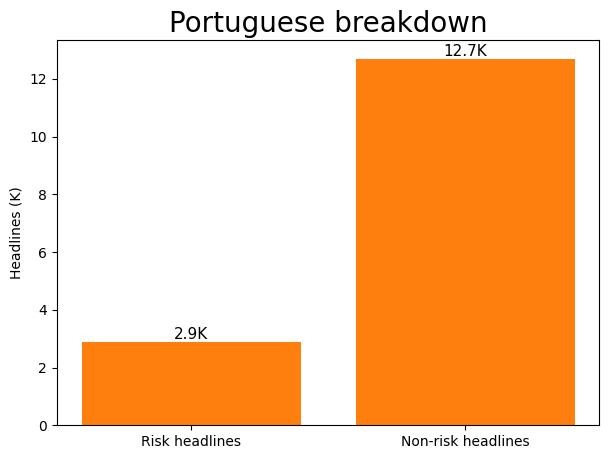

In [2]:
import matplotlib.pyplot as plt

# risk types
risk_types = ['political_stability', 'security_violence', 'economic_regulatory']

# plot risk vs non-risk headlines
def binary_plot(df, title='Total breakdown', color='tab:blue'):
    x = round(len(df[df.risk_type.isin(risk_types)]) / 1000, 1)
    y = round((len(df) - x) / 1000, 1)
    values = [x, y]
    labels = ['Risk headlines', 'Non-risk headlines']
    plt.figure(figsize=(7, 5));
    plt.bar(labels, values, color=color);
    for i, value in enumerate(values):
        plt.text(i, value, f'{value}' + 'K', fontsize=11, ha='center', va='bottom', color='black');
    plt.title(title, size=20);
    plt.ylabel('Headlines (K)');
    plt.show();

# total headlines
binary_plot(df)

# spanish headlines
spanish_df = df[df.country.isin(['Argentina', 'Colombia', 'Mexico'])]
binary_plot(spanish_df, title='Spanish breakdown', color='tab:red')

# portuguese headlines
portuguese_df = df[df.country.isin(['Brazil'])]
binary_plot(portuguese_df, title='Portuguese breakdown', color='tab:orange')

## Risk types

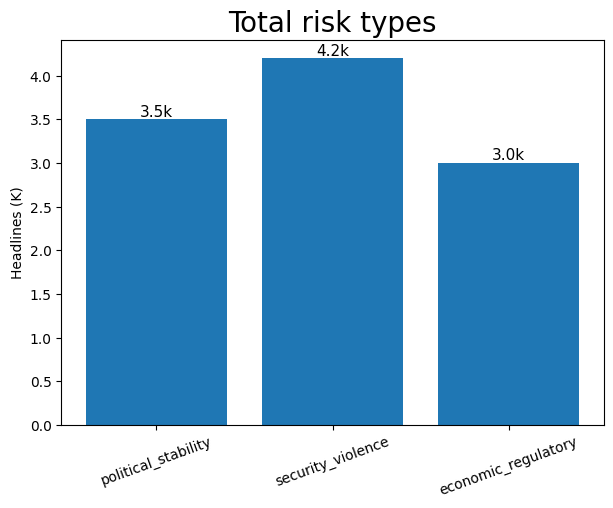

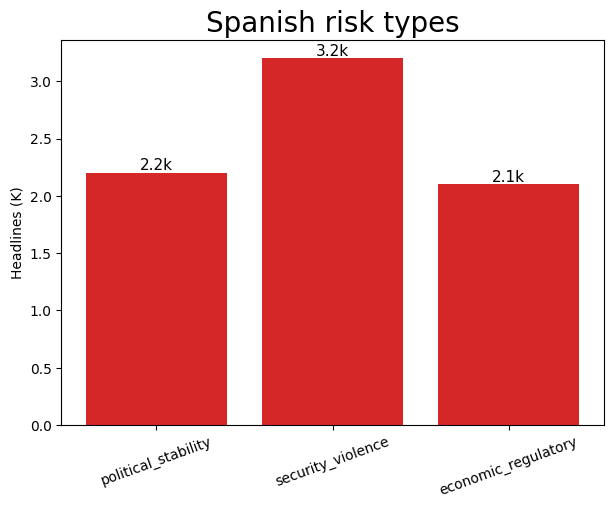

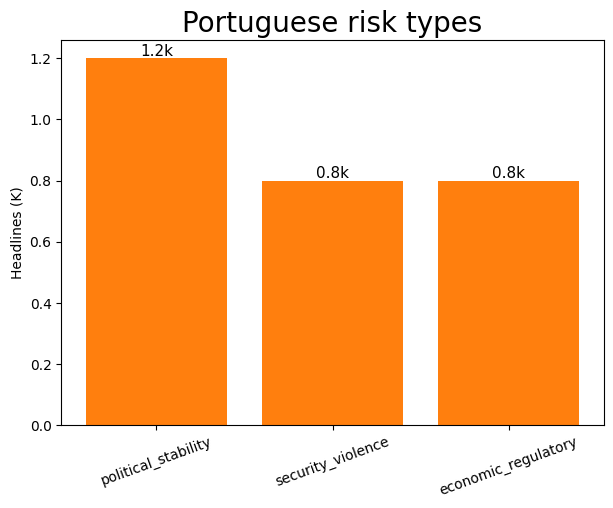

In [3]:
# plot risk types
def risk_type_plot(df, title='Total risk types', color='tab:blue'):
    risk_values = []
    for risk in risk_types:
        l = len(df[df.risk_type == risk])
        risk_values.append(round(l/1000, 1))
    plt.figure(figsize=(7, 5));
    plt.bar(risk_types, risk_values, color=color);
    for i, value in enumerate(risk_values):
        plt.text(i, value, f'{value}' + 'k', fontsize=11, ha='center', va='bottom', color='black');
    plt.title(title, size=20);
    plt.ylabel('Headlines (K)');
    plt.xticks(rotation=20);
    plt.show();

# total risk types
risk_type_plot(df)

# spanish risk types
risk_type_plot(spanish_df, title='Spanish risk types', color='tab:red')

# portuguese risk types
risk_type_plot(portuguese_df, title='Portuguese risk types', color='tab:orange')

## Word lengths

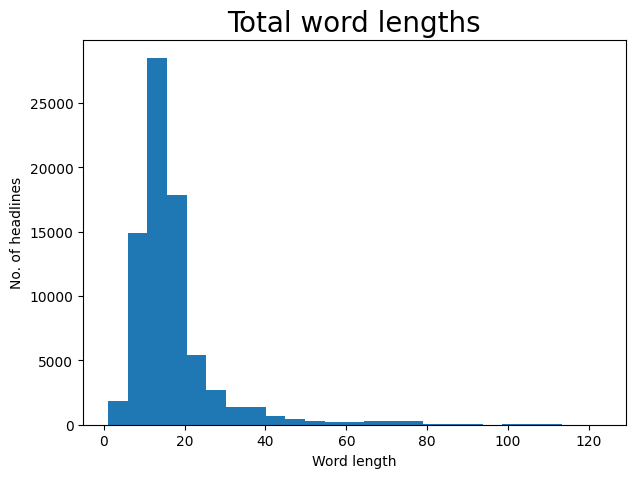

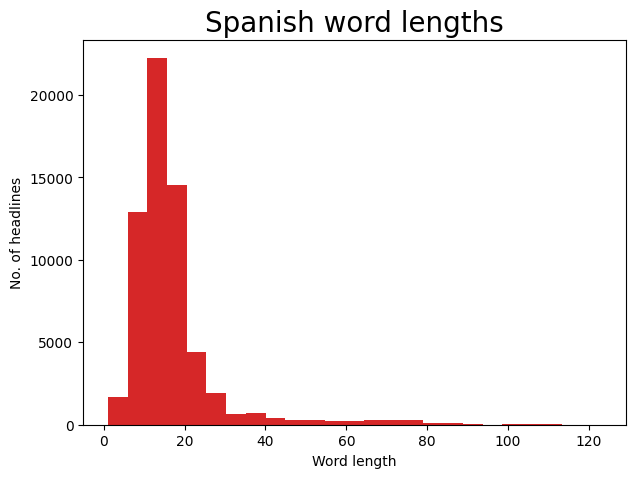

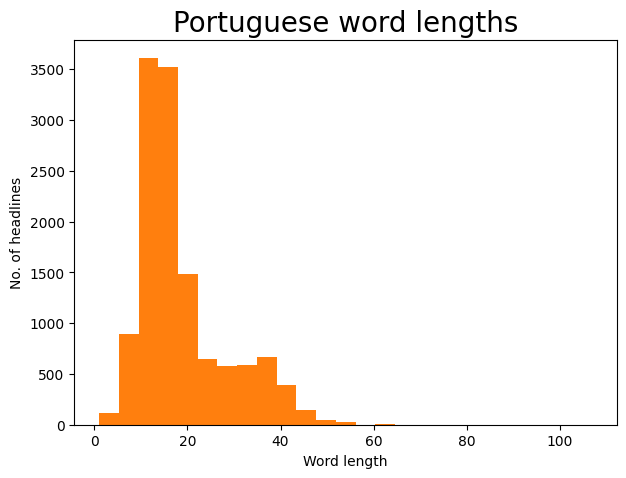

In [4]:
# plot word lengths
def word_len_hist(df, title='Total word lengths', color='tab:blue'):
    lens = [len(x.replace('\n', ' ').split(' ')) for x in df.headline]
    plt.figure(figsize=(7, 5));
    plt.hist(lens, bins=25, color=color);
    plt.xlabel('Word length');
    plt.ylabel('No. of headlines');
    plt.title(title, size=20);
    plt.show();


# total word lengths
word_len_hist(df)

# spanish word lengths
word_len_hist(spanish_df, title='Spanish word lengths', color='tab:red')

# portuguese word lengths
word_len_hist(portuguese_df, title='Portuguese word lengths', color='tab:orange')